In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importamos bibliotecas básicas para la gestión y el análisis de datos.
#Comentario extra

CENSOS Y CONTEOS DE POBLACIÓN Y VIVIENDA - INEGI

Estadísticas censales a escalas geoelectorales, año 2020

Data source: https://www.inegi.org.mx/datosabiertos/

In [16]:

#df = pd.read_csv('/content/conjunto_de_datos_iter_00CSV20.csv')
df = pd.read_csv('./Bases_de_datos/México/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_22376\3019917337.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Bases_de_datos/México/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')


In [17]:
#GENERAR DATAFRAME SOLO CON COLUMNAS Y FILAS DE INTERÉS

df_resumen = df.loc[[0, 3, 2061, 7627, 10188, 12988, 17137, 18396, 39883, 52272, 52938, 58944, 67889, 74890, 79806, 90521, 95657, 104613, 106291, 109204, 114178, 126034, 133093, 135342, 137585, 144314, 149866, 157366, 159883, 166578, 167901, 188302, 190993], ['ENTIDAD', 'NOM_ENT', 'LONGITUD', 'LATITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'P3YM_HLI', 'PCON_DISC', 'PCLIM_PMEN', 'P15YM_AN', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PSINDER', 'PDER_SS', 'VIVTOT', 'TVIVHAB', 'TVIVPAR', 'VIVPAR_DES', 'PROM_OCUP', 'VPH_C_SERV', 'VPH_NDEAED', 'VPH_PC', 'VPH_CEL']]
#Utilizamos la función ".loc()" para generar un nuevo dataframe con el nombre "df_resumen".
#El dataframe resultante tendrá solamente las filas y columnas que nos interesan.

df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 190993
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ENTIDAD     33 non-null     int64 
 1   NOM_ENT     33 non-null     object
 2   LONGITUD    0 non-null      object
 3   LATITUD     0 non-null      object
 4   POBTOT      33 non-null     int64 
 5   POBFEM      33 non-null     object
 6   POBMAS      33 non-null     object
 7   P3YM_HLI    33 non-null     object
 8   PCON_DISC   33 non-null     object
 9   PCLIM_PMEN  33 non-null     object
 10  P15YM_AN    33 non-null     object
 11  GRAPROES    33 non-null     object
 12  GRAPROES_F  33 non-null     object
 13  GRAPROES_M  33 non-null     object
 14  PSINDER     33 non-null     object
 15  PDER_SS     33 non-null     object
 16  VIVTOT      33 non-null     int64 
 17  TVIVHAB     33 non-null     int64 
 18  TVIVPAR     33 non-null     object
 19  VIVPAR_DES  33 non-null     object
 20  PROM_OCUP   3

In [18]:
#CONVERTIR COLUMNAS CON DATOS TIPO "object" A DATOS TIPO "int" (en el caso de enteros)...
#... Y A DATOS TIPO "float" (en el caso de valores con decimales) EXCEPTO EN LA COLUMNA "NOM_ENT"

df_resumen['POBFEM'] = df_resumen['POBFEM'].astype(int)
df_resumen['POBMAS'] = df_resumen['POBMAS'].astype(int)
df_resumen['P3YM_HLI'] = df_resumen['P3YM_HLI'].astype(int)
df_resumen['PCON_DISC'] = df_resumen['PCON_DISC'].astype(int)
df_resumen['PCON_PCLIM_PMEN'] = df_resumen['PCLIM_PMEN'].astype(int)
df_resumen['P15YM_AN'] = df_resumen['P15YM_AN'].astype(int)
df_resumen['GRAPROES'] = df_resumen['GRAPROES'].astype(float)
df_resumen['GRAPROES_F'] = df_resumen['GRAPROES_F'].astype(float)
df_resumen['GRAPROES_M'] = df_resumen['GRAPROES_M'].astype(float)
df_resumen['PSINDER'] = df_resumen['PSINDER'].astype(int)
df_resumen['PDER_SS'] = df_resumen['PDER_SS'].astype(int)
df_resumen['VIVTOT'] = df_resumen['VIVTOT'].astype(int)
df_resumen['TVIVHAB'] = df_resumen['TVIVHAB'].astype(int)
df_resumen['TVIVPAR'] = df_resumen['TVIVPAR'].astype(int)
df_resumen['VIVPAR_DES'] = df_resumen['VIVPAR_DES'].astype(int)
df_resumen['PROM_OCUP'] = df_resumen['PROM_OCUP'].astype(float)
df_resumen['VPH_C_SERV'] = df_resumen['VPH_C_SERV'].astype(int)
df_resumen['VPH_NDEAED'] = df_resumen['VPH_NDEAED'].astype(int)
df_resumen['VPH_PC'] = df_resumen['VPH_PC'].astype(int)
df_resumen['VPH_CEL'] = df_resumen['VPH_CEL'].astype(int)

#Utilizamos la función ".astype()" para convertir los datos tipo "object" a datos numéricos de dos tipo:
#... de tipo "int" para los números enteros y de tipo "float" para valores con decimales.


In [19]:
df_resumen.head(35)

,ENTIDAD,NOM_ENT,LONGITUD,LATITUD,POBTOT,POBFEM,POBMAS,P3YM_HLI,PCON_DISC,PCLIM_PMEN,...,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,PROM_OCUP,VPH_C_SERV,VPH_NDEAED,VPH_PC,VPH_CEL,PCON_PCLIM_PMEN
0,0,Total nacional,NaN,NaN,126014024,64540634,61473390,7364645,6179890,1590583,...,43903443,35233462,42300700,6155682,3.56,32671764,79584,13204680,30775898,1590583
3,1,Aguascalientes,NaN,NaN,1425607,728924,696683,2539,71294,20169,...,463972,386671,453099,60327,3.68,380982,184,177149,359895,20169
2061,2,Baja California,NaN,NaN,3769020,1868431,1900589,49130,151945,52519,...,1325949,1149563,1236142,119411,3.26,1085176,3062,576454,1080169,52519
7627,3,Baja California Sur,NaN,NaN,798447,392568,405879,13581,35383,10423,...,299873,240660,286051,35776,3.30,220917,450,108948,226517,10423
10188,4,Campeche,NaN,NaN,928363,471424,456939,91801,52259,12314,...,321634,260824,312770,42196,3.55,236503,889,87769,218322,12314
12988,5,Coahuila de Zaragoza,NaN,NaN,3146771,1583102,1563669,5527,134816,35073,...,1078048,901249,1043108,129872,3.48,879659,538,367970,824291,35073
17137,6,Colima,NaN,NaN,731391,370769,360622,5210,39880,10032,...,288978,227050,278552,47329,3.21,222876,174,90200,206736,10032
18396,7,Chiapas,NaN,NaN,5543828,2837881,2705947,1459648,227878,53259,...,1694405,1351630,1668330,241916,4.09,1129602,7736,212970,944695,53259
39883,8,Chihuahua,NaN,NaN,3741869,1888047,1853822,110498,167788,49299,...,1401765,1146915,1348614,186778,3.25,1095836,5950,488724,1051045,49299
52272,9,Ciudad de México,NaN,NaN,9209944,4805017,4404927,125153,493589,145428,...,3036239,2757433,2883154,207026,3.32,2715805,175,1649403,2536523,145428


# **ESTADÍSTICA DESCRIPTIVA SOBRE POBLACIÓN**

Text(0.5, 1.0, 'Población total en la República Mexicana en el 2020: 126014024 \n(datos del censo de población y vievienda del 2020)')

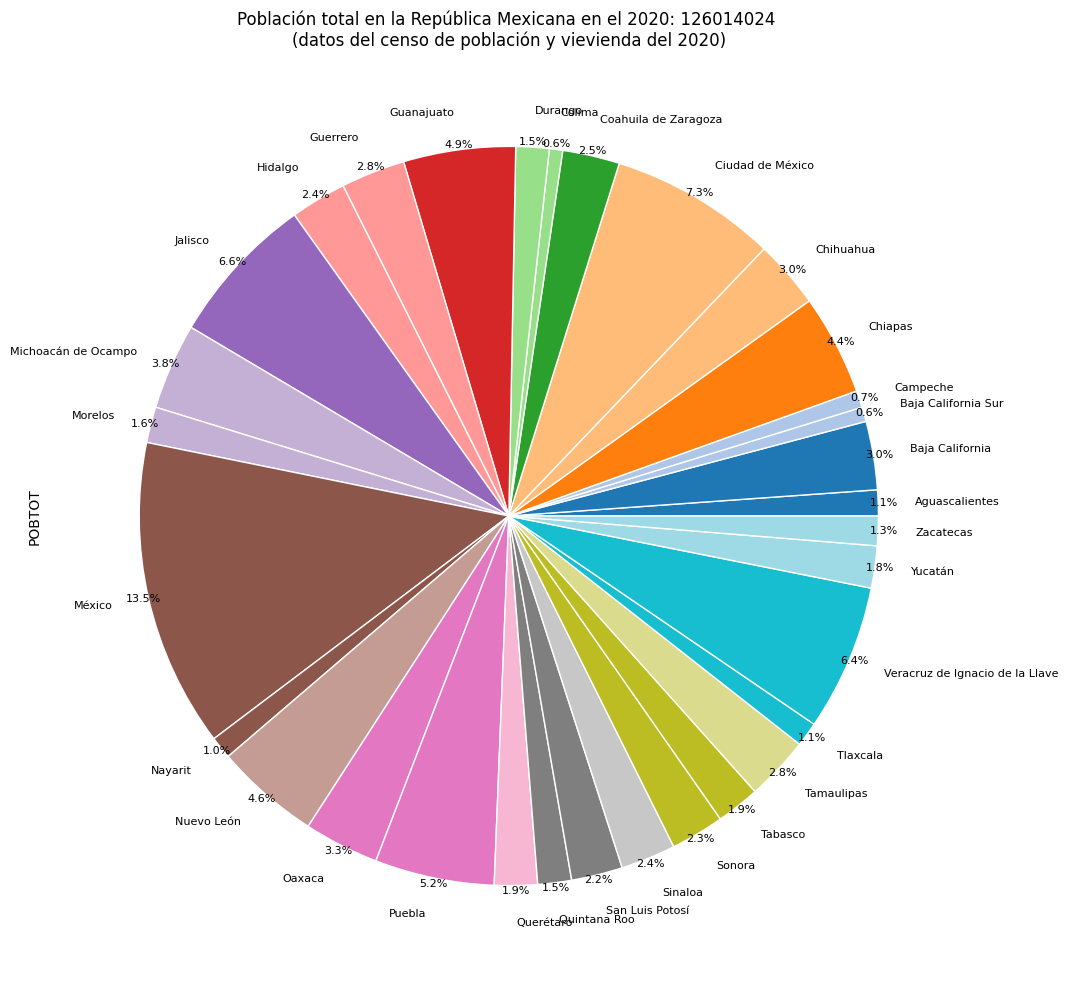

In [20]:
#DISTRIBUCIÓN DE LA POBLACIÓN TOTAL EN MÉXICO POR ENTIDAD FEDERATIVA

poblacion_total = df_resumen['POBTOT'].max()
#Seleccionamos el valor máximo de la columna "POBTOT" cual corresponde a la población total a nivel nacional.
poblacion_total_agrupada = df_resumen[df_resumen.index != 0].groupby('NOM_ENT')['POBTOT'].sum()
#Generamos un nuevo dataframe llamado "poblacion_total_agrupada" a partir de ciertas condiciones aplicadas al dataframe "df_resumen".
#"[df_resumen.index != 0]" Este fragmento del código es un filtro que aplica una indexación booleana en donde...
#... se excluyen los valores de la fila "0"

#Por otra parte, el fragmento ".groupby('NOM_ENT')['POBTOT'].sum().sort_index()" hace que los datos del dataframe resultante...
#... se agrupen por los valores únicos de la columna "NOM_ENT". Para cada categoría de la columna "NOM_ENT" se suma el valor...
#... correspondiente de la columna "POBTOT".

plt.figure(figsize=(15, 12))

poblacion_total_agrupada.plot(kind='pie', cmap='tab20', autopct='%1.1f%%', pctdistance=1.015, fontsize=8, wedgeprops=dict(edgecolor='white'))
#A partir del dataframe "poblacion_total_agrupada" generamos un gráfico de pastel con distintas especificaciones
#El argumento "wedgeprops=dict(edgecolor='white')" se utiliza para establecer el color del borde de cada porción del pastel.

plt.title(f'Población total en la República Mexicana en el 2020: {poblacion_total} \n(datos del censo de población y vievienda del 2020)')


In [21]:
#DISTRIBUCIÓN DE LA POBLACIÓN TOTAL EN MÉXICO POR ENTIDAD FEDERATIVA Y GÉNERO.

poblacion_por_genero = df_resumen[df_resumen.index != 0].groupby('NOM_ENT')['POBMAS', 'POBFEM'].sum()
#Generamos un nuevo dataframe llamado "poblacion_por_genero" a partir del dataframe "df_resumen".
#Este nuevo dataframe se genera excluyendo la información de la fila "0" a través del argumento "[df_resumen.index != 0]".
#La información dentro del nuevo dataframe se agrupa a partir de los valores únicos de la columna "NOM_ENT" en donde...
#... cada fila tendrá el resultado de la suma de los valores de las columnas "POBFEM" y "POBMAS".


#GRÁFICO DE PASTEL: proporción de hombres y mujeres dentro de la población total en México.
total_hombres = df_resumen['POBMAS'].max()
#Generamos la variable "total_hombres" la cual tendrá el valor más alto de la columna "POBMAS"
total_mujeres = df_resumen['POBFEM'].max()
#Generamos la variable "total_mujeres" la cual tendrá el valor más alto de la columna "POBFEM"
hombres_y_mujeres = pd.DataFrame({'Género': ['Hombres', 'Mujeres'], 'Población': [total_hombres, total_mujeres]})
#Creamos un dataframe nuevo utilizando la función ".DataFrame" y las variables "total_mujeres" y "total_hombres"
#Este nuevo daframe se llamará "hombres_y_mujeres" y tendrá solo dos columnas ("Género" y "Población")...
#... y dos filas (la fila 0 = "total_hombres" y la fila 1 = "total_mujeres")

plt.figure(figsize=(4, 4))
plt.pie(hombres_y_mujeres['Población'], labels=hombres_y_mujeres['Género'], autopct='%1.1f%%', colors=['teal', 'darkorange'], wedgeprops=dict(edgecolor='white'))
plt.title(f'Proporción de la población total por género a nivel nacional \n (Población total: {poblacion_total}) ')
plt.show()


#GRÁFICO DE BARRAS APILADAS: población total por estado y proporción de hombres y mujeres por estado.
poblacion_por_genero.plot(kind='bar', stacked=True, color=['darkorange', 'teal'], figsize=(10, 4))
plt.title('Población por género y entidad federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Población')
plt.legend(title='Género', labels=['Femenino', 'Masculino'])
plt.show


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

<ipython-input-38-fae9ac97832f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graproes_grupos = df_resumen[df_resumen.index != 0].groupby('NOM_ENT')['GRAPROES', 'GRAPROES_F', 'GRAPROES_M'].sum()


<function matplotlib.pyplot.show(close=None, block=None)>

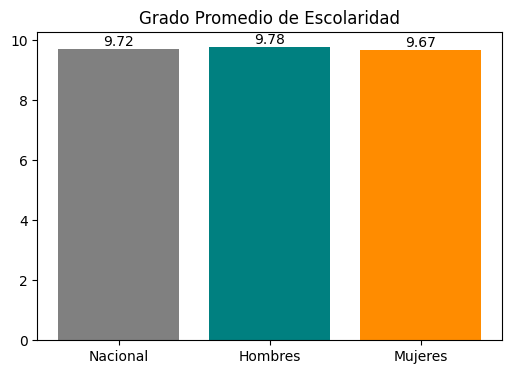

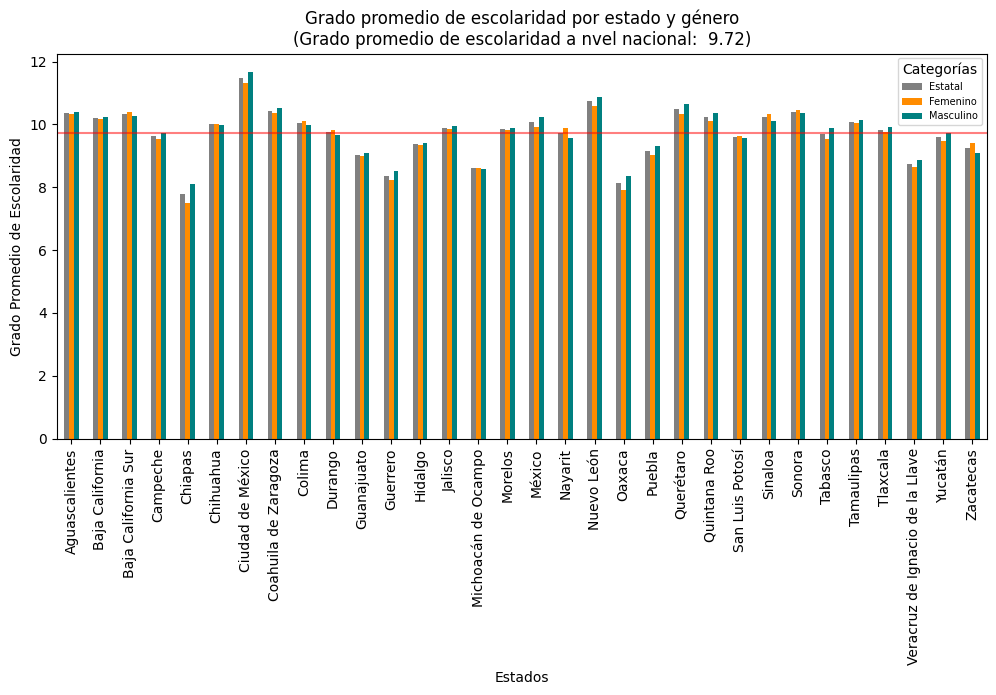

In [ ]:
#GRÁFICO DE BARRAS COMPARATIVAS: GRAPROES NACIONAL, DE HOMBRE, Y DE MUJERES.
graproes_grupos = df_resumen[df_resumen.index != 0].groupby('NOM_ENT')['GRAPROES', 'GRAPROES_F', 'GRAPROES_M'].sum()

df_graproes = df_resumen[df_resumen.index != 0][['NOM_ENT', 'GRAPROES']].set_index('NOM_ENT').sort_index()
#Generamos un nuevo dataframe llamado "df_graproes".
#Hacemos esto siguiendo la misma estructura de código utilizada en el paso anterior, pero cambiando a la columna "P15YM_AN"...
#... por la columna "GRAPROES"

#GRÁFICO DE BARRAS SIMPLE: GRAPROES nacional y por género.
GRAPROES_nacional = df_graproes['GRAPROES'].mean()
graproes_hombres = graproes_grupos['GRAPROES_M'].mean()
graproes_mujeres = graproes_grupos['GRAPROES_F'].mean()
graproes_N_M_F = pd.DataFrame({'Categorías': ['Nacional', 'Hombres', 'Mujeres'], 'Grado Promedio de Escolaridad': [GRAPROES_nacional, graproes_hombres, graproes_mujeres]})
x = graproes_N_M_F['Categorías']
y = graproes_N_M_F['Grado Promedio de Escolaridad']
colores = ['gray', 'teal', 'darkorange']

plt.figure(figsize=(6, 4))
barras = plt.bar(x, y, color=colores)
for barra in barras:
#Usamos un bucle "for" para recorrer cada barra en el gráfico de barras.
  height = barra.get_height()
  #La función ".get_height()" nos permite obtener la altura para cada barra dentro del diagrama.
  plt.text(barra.get_x() + barra.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
  #Utilisamos "plt.text()" para agregar texto al gráfico, esta función toma varios argumentos incluídos:...
  #... la posición x, la posición y, el texto a mostrar y otros parámetros opcionales.
  #"barra.get_x() devuelve la posición x de la esquina izquierda de la barra.
  #"+ barra.get_width() / 2" devuelve el ancho de la barra. Dividiendo el ancho por 2 y...
  # sumándolo a la posición x, obtenemos la posición x al centro de la barra.
  #"height"  Representa la altura de la barra actual.
plt.title(f'Grado Promedio de Escolaridad')


#GRÁFICO DE TRIPLE BARRA: GRAPROES por entidad federativa y género.
graproes_grupos.plot(kind='bar', stacked=False, color=['gray','darkorange', 'teal'], figsize=(12, 5))
plt.title(f'Grado promedio de escolaridad por estado y género\n(Grado promedio de escolaridad a nvel nacional: {GRAPROES_nacional: .2f})')
plt.xlabel('Estados')
plt.ylabel('Grado Promedio de Escolaridad')
plt.legend(title='Categorías', labels=['Estatal', 'Femenino', 'Masculino'], loc='upper right', fontsize=7)
plt.axhline(y=GRAPROES_nacional, color='red', linestyle='-', alpha=0.5)
#Ejecutando la función ".axhline()" podemos agregar una línea horizontal al gráfico.
#El argumento "y=GRAPROES_nacional" hace que la línea sobre el eje y en el valor contenido por la variable "GRAPROES_nacional"
#Por otra parte, el argumento "alpha=0.7" nos permite indicar el grado de transparencia para esta línea...
#... este argumento acepta valores entre 0 y 1 donde: 0=totalmente transparente y 1=nada transparente
plt.show



In [22]:
#MAPA DE CALOR
df_sin_fila0 = df_resumen[df_resumen.index != 0]

plt.figure(figsize=(10, 8))
sns.heatmap(df_sin_fila0.corr(), annot=True, cmap='coolwarm', annot_kws={'fontsize': 7}, linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show

ValueError: could not convert string to float: 'Aguascalientes'

<Figure size 1000x800 with 0 Axes>

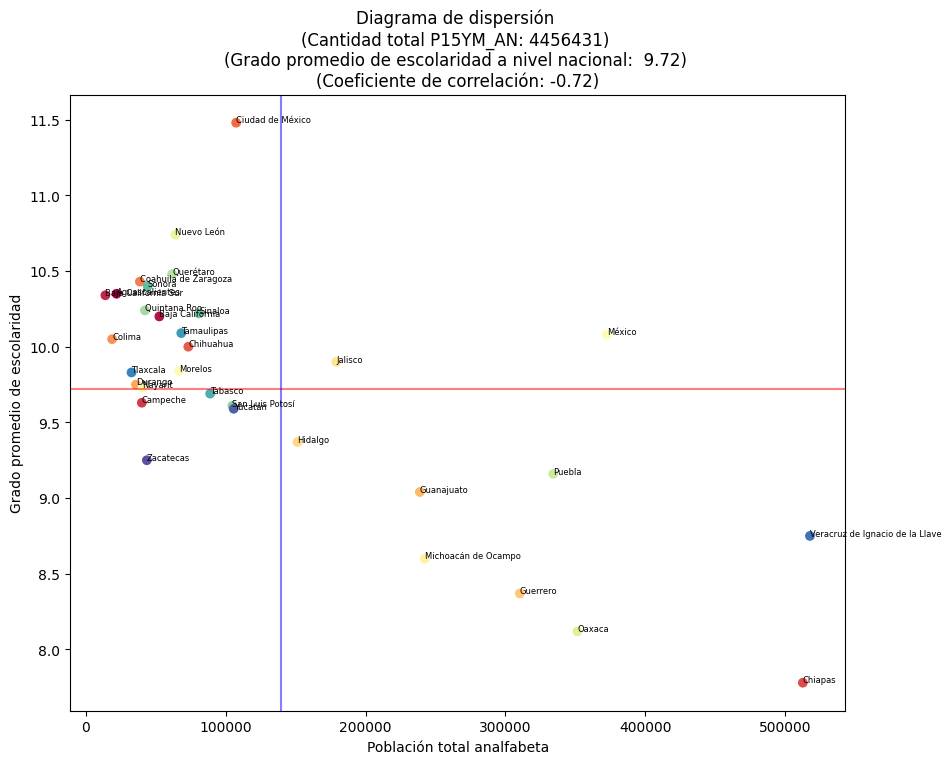

In [ ]:
#DIAGRAMA DE DISPERSIÓN ENTRE ANALFABETISMO Y GRADO PROMEDIO DE ESCOLARIDAD

df_an = df_resumen[df_resumen.index != 0][['NOM_ENT','P15YM_AN']].set_index('NOM_ENT').sort_index()
#A partir del dataframe "df_resumen" generamos un  nuevo dataframe llamado "df_an" en el cual se excluyen los valores...
#... de la fila "0" del datafraeme original.
#Después de filtrar las filas, estamos seleccionando solo las columnas 'NOM_ENT' y 'P15YM_AN' mediante la notación...
#... de lista dentro de corchetes, lo que nos permite seleccionar múltiples columnas.
#Después de seleccionar las columnas, estamos estableciendo la columna "NOM_ENT" como el índice del dataframe resultante...
#... a través del argumento ".set_index('NOM_ENT')".
#Finalmente, estamos ordenando el DataFrame resultante según el índice ('NOM_ENT') en orden ascendente.
#Esto se logra mediante el método sort_index()


x = df_an['P15YM_AN']
#Definimos los valores del eje X
y = df_graproes['GRAPROES']
#Definimos los valores del eje Y
estados = df_an.index
#Obtenemos los nombres de los estados a partir del índice de dataframe "df_an"

total_P15YM_AN = df_an['P15YM_AN'].sum()
promedio_P15YM_AN = df_an['P15YM_AN'].mean()

correlacion_P15YM_AN_GRAPROES = df_an['P15YM_AN'].corr(df_graproes['GRAPROES'])
#Calculamos el coeficiente de correlación entre las varaibels "P15YM_AN" y "GRAPROES".
#El coeficiente de correlación se calcula en valores que van de -1 a 1 en donde:
#1 = correlación positiva perfecta, 0 = correlación nula, y -1 = correlación negativa perfecta.

colores = np.arange(len(x))
#Generamos un array que contiene los números enteros desde 0 hasta "x" menos 1.
# Este array se utiliza típicamente para asignar colores a los puntos en un gráfico de dispersión,...
#... donde cada número entero representa un color distinto.
#... En este contexto, se utiliza como argumento para el parámetro c en la función plt.scatter(),...
#... lo que permite asignar un color diferente a cada punto en función de su posición en la serie de datos x

plt.figure(figsize=(10, 8))

plt.scatter(x, y,  c=colores, cmap='Spectral')
#Aplicamos la función ".scatter()" para generar un diagrama de dispersión.
#Estos son los datos que se utilizarán para los ejes x e y del diagrama de dispersión....
#... En este caso, x representa la población total analfabeta y y representa el grado promedio de escolaridad.
#Aplicamos el parámetro "c" haciendo uso de los valores concentrados en la variable "colores" para que se apliquen...
#... distintos colores a cada punto dentro de l maa de dispersión.
#Finalmente, definimos el mapa de color que se utilizará en el diagrama, en este caso se aplica el mapa "Spectral"

plt.axhline(y=GRAPROES_nacional, color='red', linestyle='-', alpha=0.5)
plt.axvline(x=promedio_P15YM_AN, color='blue', linestyle='-', alpha=0.5)

plt.xlabel('Población total analfabeta')
plt.ylabel('Grado promedio de escolaridad')
plt.title(f'Diagrama de dispersión \n(Cantidad total P15YM_AN: {total_P15YM_AN}) \n(Grado promedio de escolaridad a nivel nacional: {GRAPROES_nacional: .2f}) \n(Coeficiente de correlación: {correlacion_P15YM_AN_GRAPROES: .2f})')

for i, estado in enumerate(estados):
#Este es un bucle "for" que recorre cada elemento de "estados". i es el índice del elemento en la lista,...
#... y estado es el valor del elemento en la lista.
#"enumerate(estados)" "enumerate()" es una función de Python que toma una secuencia (en este caso, la lista estados)...
#... y devuelve un iterable que genera pares (índice, valor) para cada elemento en la secuencia.
#En este caso, estamos iterando sobre los elementos de estados y obteniendo tanto el índice como el valor en cada iteración.
  plt.text(x[i], y[i], estado, fontsize=6)
  # Dentro del bucle, utilizamos la función "plt.text()"" para agregar texto al gráfico. x[i] y y[i] son las coordenadas...
  #... del punto en el gráfico de dispersión correspondiente al estado actual.
  #"estado" es el nombre del estado que estamos agregando como texto en el gráfico.
  #fontsize=6 establece el tamaño de la fuente del texto en 6 puntos.

# Mostrar el diagrama de dispersión
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

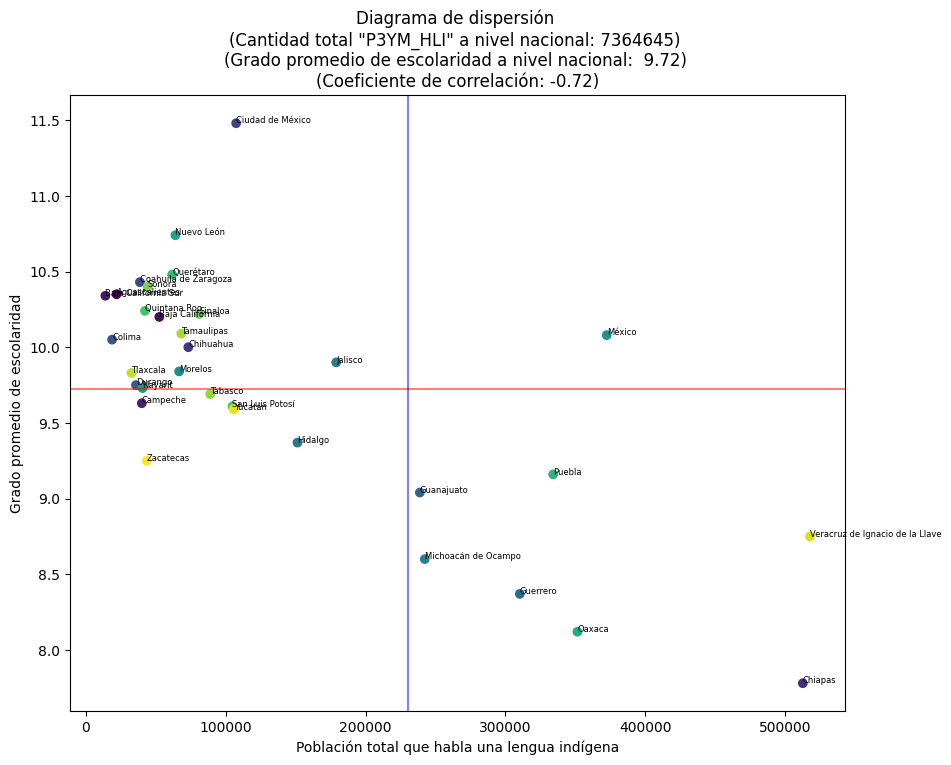

In [ ]:
#DIAGRAMA DE DISPERCIÓN ENTRE GRAPROES Y HLI
df_hli = df_resumen[df_resumen.index != 0][['NOM_ENT','P3YM_HLI']].set_index('NOM_ENT').sort_index()

x2 = df_hli['P3YM_HLI']
y2 = df_graproes['GRAPROES']
estados = df_hli.index
poblacion_hli = df_hli['P3YM_HLI'].sum()

promedio_P3YM_HLI = df_hli['P3YM_HLI'].mean()

correlacion_P3YM_HLI_GRAPROES = df_hli['P3YM_HLI'].corr(df_graproes['GRAPROES'])

colores = np.arange(len(x))

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colores, cmap='viridis')

plt.axhline(y=GRAPROES_nacional, color='red', linestyle='-', alpha=0.5)
plt.axvline(x=promedio_P3YM_HLI, color='blue', linestyle='-', alpha=0.5)

plt.xlabel('Población total que habla una lengua indígena')
plt.ylabel('Grado promedio de escolaridad')
plt.title(f'Diagrama de dispersión \n(Cantidad total "P3YM_HLI" a nivel nacional: {poblacion_hli}) \n(Grado promedio de escolaridad a nivel nacional: {GRAPROES_nacional: .2f}) \n(Coeficiente de correlación: {correlacion_P15YM_AN_GRAPROES: .2f})')

for i,estado in enumerate(estados):
  plt.text(x[i], y[i], estado, fontsize=6)

plt.show

# **ESTADÍSITCA DESCRIPTIVA SOBRE VIVIENDAS**



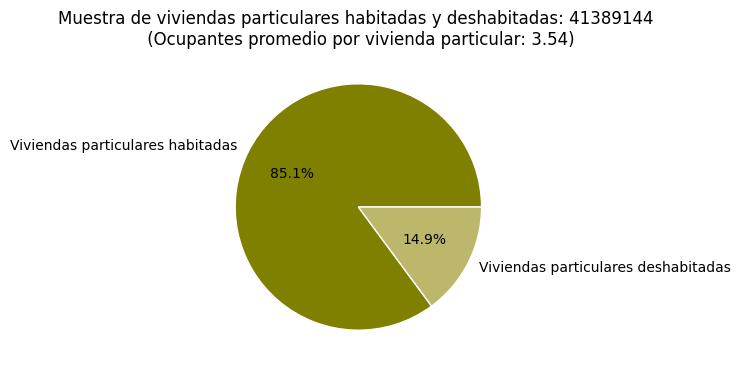

<function matplotlib.pyplot.show(close=None, block=None)>

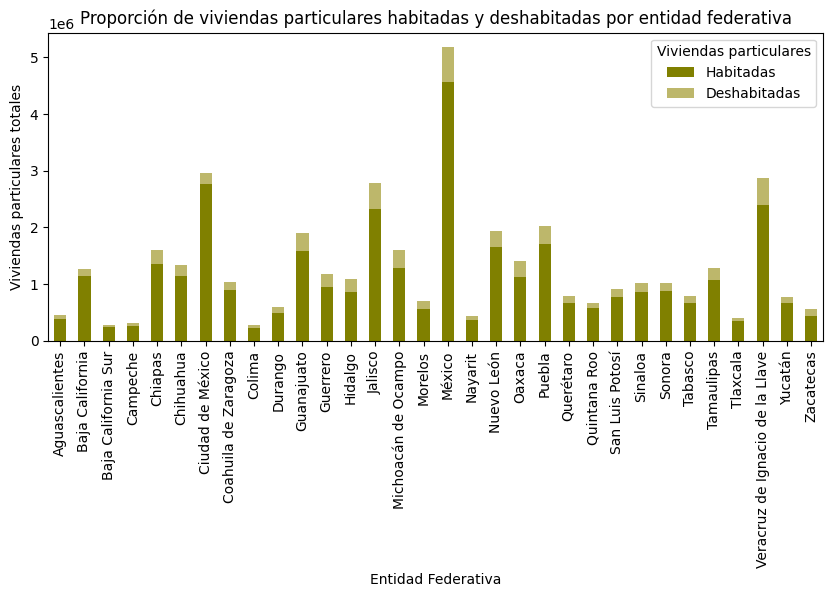

In [ ]:
#VIVIENDAS HABITADAS VS VIVIENDS DESHABITADAS

#GRÁFICO DE PASTEL: PROPORCIÓN DE VIVIENDAS HABITADAS VS DESHABITADAS
df_viv = df_resumen[df_resumen.index != 0][['NOM_ENT', 'TVIVHAB', 'VIVPAR_DES']].set_index('NOM_ENT').sort_index()

ocupantes_promedio = df_resumen[df_resumen.index != 0]['PROM_OCUP'].mean()

viv_hab = df_viv['TVIVHAB'].sum()
viv_deshab = df_viv['VIVPAR_DES'].sum()
tot_hab_y_deshab = viv_hab + viv_deshab
df_hab_y_deshab = pd.DataFrame({'Categorías': ['Viviendas particulares habitadas', 'Viviendas particulares deshabitadas'], 'Cantidad de viviendas': [viv_hab, viv_deshab]})

plt.figure(figsize=(4, 4))
plt.pie(df_hab_y_deshab['Cantidad de viviendas'], labels=df_hab_y_deshab['Categorías'], autopct='%1.1f%%', colors=['olive', 'darkkhaki'], wedgeprops=dict(edgecolor='white'))
plt.title(f'Muestra de viviendas particulares habitadas y deshabitadas: {tot_hab_y_deshab} \n (Ocupantes promedio por vivienda particular: {ocupantes_promedio:.2f})')
plt.show()

#GRÁFICO DE BARRAS APILADAS: PROPORCIÓN DE VIVIENDAS HABITADAS Y DESHABITADAS POR ESTADO
df_viv.plot(kind='bar', stacked=True, color=['olive', 'darkkhaki'], figsize=(10, 4))
plt.title('Proporción de viviendas particulares habitadas y deshabitadas por entidad federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Viviendas particulares totales')
plt.legend(title='Viviendas particulares', labels=['Habitadas', 'Deshabitadas'])
plt.show

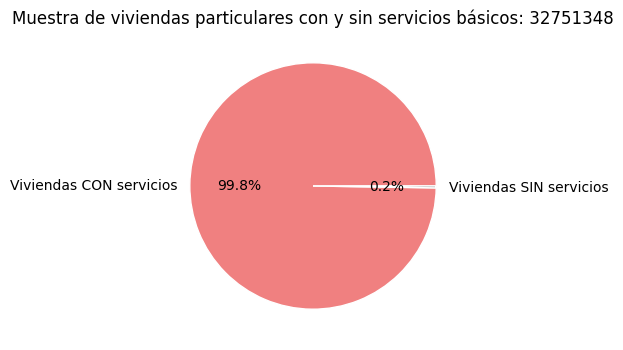

<function matplotlib.pyplot.show(close=None, block=None)>

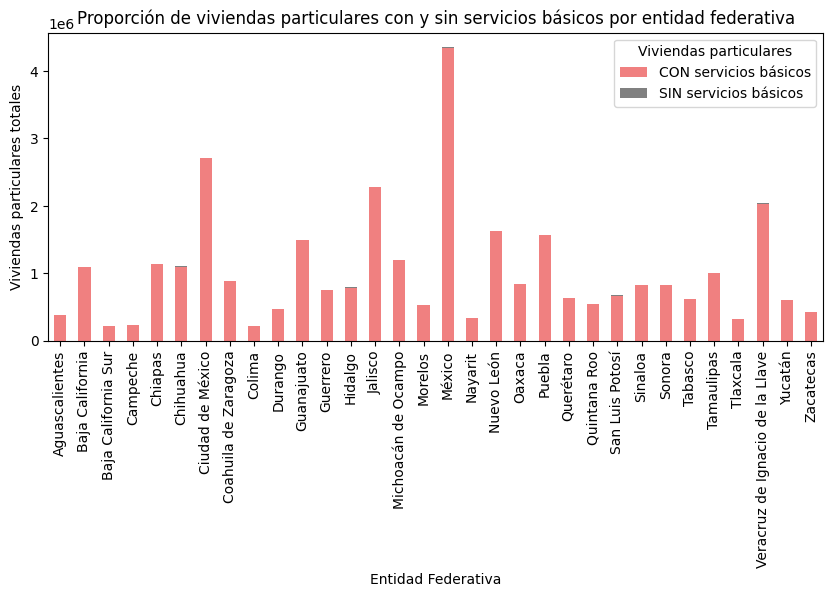

In [ ]:
#VIVIENDAS CON SERVICIOS BÁSICOS VS VIVIENDAS SIN SERVICIOS BÁSICOS
#SERVICIOS BÁSICOS CONSIDERA: energía eléctrica, agua entubada de la red pública y drenaje.

#GRÁFICO DE PASTEL: PROPORCIÓN DE VIVIENDAS HABITADAS VS DESHABITADAS
df_viv_serv = df_resumen[df_resumen.index != 0][['NOM_ENT', 'VPH_C_SERV', 'VPH_NDEAED']].set_index('NOM_ENT').sort_index()

viv_con_serv = df_viv_serv['VPH_C_SERV'].sum()
viv_sin_serv = df_viv_serv['VPH_NDEAED'].sum()
viv_con_y_sin_serv = viv_con_serv + viv_sin_serv
df_con_y_sin_serv = pd.DataFrame({'Categorías': ['Viviendas CON servicios', 'Viviendas SIN servicios'], 'Viviendas totales': [viv_con_serv , viv_sin_serv ]})

plt.figure(figsize=(4, 4))
plt.pie(df_con_y_sin_serv['Viviendas totales'], labels=df_con_y_sin_serv['Categorías'], autopct='%1.1f%%', colors=['lightcoral', 'gray'], wedgeprops=dict(edgecolor='white'))
plt.title(f'Muestra de viviendas particulares con y sin servicios básicos: {viv_con_y_sin_serv}')
plt.show()


#GRÁFICO DE BARRAS APILADAS: PROPORCIÓN DE VIVIENDAS HABITADAS Y DESHABITADAS POR ESTADO
df_viv_serv.plot(kind='bar', stacked=True, color=['lightcoral', 'gray'], figsize=(10, 4))
plt.title('Proporción de viviendas particulares con y sin servicios básicos por entidad federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Viviendas particulares totales')
plt.legend(title='Viviendas particulares', labels=['CON servicios básicos', 'SIN servicios básicos'])
plt.show

In [ ]:
#GENERAR DATAFRAME SOLO CON LAS ENTIDADES FEDERATIVAS

df_resumen = df.loc[[3, 2061, 7627, 10188, 12988, 17137, 18396, 39883, 52272, 52938, 58944, 67889, 74890, 79806, 90521, 95657, 104613, 106291, 109204, 114178, 126034, 133093, 135342, 137585, 144314, 149866, 157366, 159883, 166578, 167901, 188302, 190993], ['ENTIDAD', 'NOM_ENT', 'LONGITUD', 'LATITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'P3YM_HLI', 'PCON_DISC', 'PCLIM_PMEN', 'P15YM_AN', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PSINDER', 'PDER_SS', 'VIVTOT', 'TVIVHAB', 'TVIVPAR', 'VIVPAR_DES', 'PROM_OCUP', 'VPH_C_SERV', 'VPH_NDEAED', 'VPH_PC', 'VPH_CEL']]
#Utilizamos la función ".loc()" para generar un nuevo dataframe con el nombre "df_resumen".
#El dataframe resultante tendrá solamente las filas y columnas que nos interesan.

df_resumen.head(33)

,ENTIDAD,NOM_ENT,LONGITUD,LATITUD,POBTOT,POBFEM,POBMAS,P3YM_HLI,PCON_DISC,PCLIM_PMEN,...,PDER_SS,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,PROM_OCUP,VPH_C_SERV,VPH_NDEAED,VPH_PC,VPH_CEL
3,1,Aguascalientes,NaN,NaN,1425607,728924,696683,2539,71294,20169,...,1161139,463972,386671,453099,60327,3.68,380982,184,177149,359895
2061,2,Baja California,NaN,NaN,3769020,1868431,1900589,49130,151945,52519,...,2905265,1325949,1149563,1236142,119411,3.26,1085176,3062,576454,1080169
7627,3,Baja California Sur,NaN,NaN,798447,392568,405879,13581,35383,10423,...,664122,299873,240660,286051,35776,3.3,220917,450,108948,226517
10188,4,Campeche,NaN,NaN,928363,471424,456939,91801,52259,12314,...,719677,321634,260824,312770,42196,3.55,236503,889,87769,218322
12988,5,Coahuila de Zaragoza,NaN,NaN,3146771,1583102,1563669,5527,134816,35073,...,2540708,1078048,901249,1043108,129872,3.48,879659,538,367970,824291
17137,6,Colima,NaN,NaN,731391,370769,360622,5210,39880,10032,...,605947,288978,227050,278552,47329,3.21,222876,174,90200,206736
18396,7,Chiapas,NaN,NaN,5543828,2837881,2705947,1459648,227878,53259,...,3698663,1694405,1351630,1668330,241916,4.09,1129602,7736,212970,944695
39883,8,Chihuahua,NaN,NaN,3741869,1888047,1853822,110498,167788,49299,...,3156294,1401765,1146915,1348614,186778,3.25,1095836,5950,488724,1051045
52272,9,Ciudad de México,NaN,NaN,9209944,4805017,4404927,125153,493589,145428,...,6689012,3036239,2757433,2883154,207026,3.32,2715805,175,1649403,2536523
52938,10,Durango,NaN,NaN,1832650,927784,904866,47242,101953,22477,...,1366665,632975,493989,614109,102682,3.69,461972,3412,169760,434450


In [ ]:
#CAMBIAR EL VALOR "México" por "Estado de México" en la columna NOM_ENT.

df_resumen.NOM_ENT.replace(['México'], 'Estado de México', inplace=True)
#Aplicamos la función ".replace()" sobre la columna "NOM_ENT" para cambiar el valor "México" poy "Estado de México".
#El argumento "inplace=True" especifica que queremos que este cambio se haga sobre el dataframe original, es decir,...
#... estamos modificando el dataframe original.

df_resumen.head(32)

,ENTIDAD,NOM_ENT,LONGITUD,LATITUD,POBTOT,POBFEM,POBMAS,P3YM_HLI,PCON_DISC,PCLIM_PMEN,...,PDER_SS,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,PROM_OCUP,VPH_C_SERV,VPH_NDEAED,VPH_PC,VPH_CEL
3,1,Aguascalientes,NaN,NaN,1425607,728924,696683,2539,71294,20169,...,1161139,463972,386671,453099,60327,3.68,380982,184,177149,359895
2061,2,Baja California,NaN,NaN,3769020,1868431,1900589,49130,151945,52519,...,2905265,1325949,1149563,1236142,119411,3.26,1085176,3062,576454,1080169
7627,3,Baja California Sur,NaN,NaN,798447,392568,405879,13581,35383,10423,...,664122,299873,240660,286051,35776,3.3,220917,450,108948,226517
10188,4,Campeche,NaN,NaN,928363,471424,456939,91801,52259,12314,...,719677,321634,260824,312770,42196,3.55,236503,889,87769,218322
12988,5,Coahuila de Zaragoza,NaN,NaN,3146771,1583102,1563669,5527,134816,35073,...,2540708,1078048,901249,1043108,129872,3.48,879659,538,367970,824291
17137,6,Colima,NaN,NaN,731391,370769,360622,5210,39880,10032,...,605947,288978,227050,278552,47329,3.21,222876,174,90200,206736
18396,7,Chiapas,NaN,NaN,5543828,2837881,2705947,1459648,227878,53259,...,3698663,1694405,1351630,1668330,241916,4.09,1129602,7736,212970,944695
39883,8,Chihuahua,NaN,NaN,3741869,1888047,1853822,110498,167788,49299,...,3156294,1401765,1146915,1348614,186778,3.25,1095836,5950,488724,1051045
52272,9,Ciudad de México,NaN,NaN,9209944,4805017,4404927,125153,493589,145428,...,6689012,3036239,2757433,2883154,207026,3.32,2715805,175,1649403,2536523
52938,10,Durango,NaN,NaN,1832650,927784,904866,47242,101953,22477,...,1366665,632975,493989,614109,102682,3.69,461972,3412,169760,434450


In [ ]:
#Cargar las coordenadas para cada estado.

coordenadas = {
    'Aguascalientes': (21.8818, -102.2916),
    'Baja California': (30.8406, -115.2838),
    'Baja California Sur': (25.1161, -111.2993),
    'Campeche': (19.3295, -90.6275),
    'Coahuila de Zaragoza': (27.0587, -101.7068),
    'Colima': (19.2452, -103.7244),
    'Chiapas': (16.7569, -93.1292),
    'Chihuahua': (28.6320, -106.0691),
    'Ciudad de México': (19.4326, -99.1332),
    'Durango': (24.0277, -104.6532),
    'Guanajuato': (21.0186, -101.2591),
    'Guerrero': (17.5778, -99.5075),
    'Hidalgo': (20.0911, -98.7624),
    'Jalisco': (20.6595, -103.3494),
    'Estado de México': (19.4969, -99.7233),
    'Michoacán de Ocampo': (19.5665, -101.7068),
    'Morelos': (18.6813, -99.1013),
    'Nayarit': (21.7514, -104.8455),
    'Nuevo León': (25.5922, -99.9962),
    'Oaxaca': (17.0732, -96.7266),
    'Puebla': (19.0414, -98.2063),
    'Querétaro': (20.5881, -100.3899),
    'Quintana Roo': (19.1817, -88.4791),
    'San Luis Potosí': (22.1566, -100.9855),
    'Sinaloa': (25.1721, -107.4795),
    'Sonora': (29.2972, -110.3306),
    'Tabasco': (17.8409, -92.6189),
    'Tamaulipas': (24.2669, -98.8363),
    'Tlaxcala': (19.3139, -98.2405),
    'Veracruz de Ignacio de la Llave': (19.1738, -96.1342),
    'Yucatán': (20.7099, -89.0943),
    'Zacatecas': (22.7709, -102.5832)
}

#Este código crea un diccionario llamado "coordenadas", el cual contiene pares "clave-valor" donde...
#... las claves son los nombres de los estados y los valores para cada clave (cada estado) son las coordenadas...
#... dadas en  orden LONGITUD, LATITUD.

In [ ]:
#AGREGAR COORDENADAS DENTRO DE LAS COLUMNS LONGITUD Y LATITUD
for estado, (latitud, longitud) in coordenadas.items():
#Empleamos un bucle "for" sobre el diccionario "coordenadas".
#Aplicando el método ".items(), esto de vuelve una lista de tuplas donde cada tupla contiene...
#... una clave y su valor correspondiente (clave = estados, y valores = coordenadas).
    idx = df_resumen.index[df_resumen['NOM_ENT'] == estado]
    #se obtiene el índice de la fila en el dataframe "df_resumen" donde el valor de la columna "NOM_ENT"...
    #... debe coincidir con el nombre del estado en cada iteración del bucle.
    df_resumen.loc[idx, 'LONGITUD'] = longitud
    df_resumen.loc[idx, 'LATITUD'] = latitud
    #A través de los nombres de los estados para localizar las filas correspondientes en el dataframe,...
    #... en cada iteración se actualizan los valores de las columnas "LONGITUD" y "LATITUD" según corresponda.

In [ ]:
df_resumen.head(32)

,ENTIDAD,NOM_ENT,LONGITUD,LATITUD,POBTOT,POBFEM,POBMAS,P3YM_HLI,PCON_DISC,PCLIM_PMEN,...,PDER_SS,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,PROM_OCUP,VPH_C_SERV,VPH_NDEAED,VPH_PC,VPH_CEL
3,1,Aguascalientes,-102.2916,21.8818,1425607,728924,696683,2539,71294,20169,...,1161139,463972,386671,453099,60327,3.68,380982,184,177149,359895
2061,2,Baja California,-115.2838,30.8406,3769020,1868431,1900589,49130,151945,52519,...,2905265,1325949,1149563,1236142,119411,3.26,1085176,3062,576454,1080169
7627,3,Baja California Sur,-111.2993,25.1161,798447,392568,405879,13581,35383,10423,...,664122,299873,240660,286051,35776,3.3,220917,450,108948,226517
10188,4,Campeche,-90.6275,19.3295,928363,471424,456939,91801,52259,12314,...,719677,321634,260824,312770,42196,3.55,236503,889,87769,218322
12988,5,Coahuila de Zaragoza,-101.7068,27.0587,3146771,1583102,1563669,5527,134816,35073,...,2540708,1078048,901249,1043108,129872,3.48,879659,538,367970,824291
17137,6,Colima,-103.7244,19.2452,731391,370769,360622,5210,39880,10032,...,605947,288978,227050,278552,47329,3.21,222876,174,90200,206736
18396,7,Chiapas,-93.1292,16.7569,5543828,2837881,2705947,1459648,227878,53259,...,3698663,1694405,1351630,1668330,241916,4.09,1129602,7736,212970,944695
39883,8,Chihuahua,-106.0691,28.632,3741869,1888047,1853822,110498,167788,49299,...,3156294,1401765,1146915,1348614,186778,3.25,1095836,5950,488724,1051045
52272,9,Ciudad de México,-99.1332,19.4326,9209944,4805017,4404927,125153,493589,145428,...,6689012,3036239,2757433,2883154,207026,3.32,2715805,175,1649403,2536523
52938,10,Durango,-104.6532,24.0277,1832650,927784,904866,47242,101953,22477,...,1366665,632975,493989,614109,102682,3.69,461972,3412,169760,434450


In [ ]:
#DESCARGAR DATAFRAME EN FORMATE CSV

df_resumen.to_csv('MX_INEGI_pob y viv_2020.csv', index=False)

from google.colab import files

files.download('MX_INEGI_pob y viv_2020.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>